In [84]:
import torch.hub
import torch
from accelerate import Accelerator
from spender.data.sdss import SDSS
import pandas as pd
from astropy.io import fits 
from astropy.table import Table
import umap 
import matplotlib.pyplot as plt
import numpy as np

# hardware optimization
accelerator = Accelerator(mixed_precision='fp16')

# get code, instrument, and pretrained spectrum model from the hub
github = "pmelchior/spender"
sdss, model = torch.hub.load("pmelchior/spender", 'sdss_II',  map_location=accelerator.device)

# get some SDSS spectra from the ids, store locally in data_path
data_path = "/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/feb2024/wk1/spender/data"


#dat = Table.read('/Users/yaroslav/Downloads/SPIDERS_Type1_DR14/xray_opt_2RXS_XMMSL.fits', format='fits')
#df = dat.to_pandas()
#df = df[['name', 'RA', 'DEC', 'Plate', 'MJD', 'FiberID']]
#df.to_csv('/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/feb2024/wk1/spender/cataogue.csv', index=False)

df = pd.read_csv('/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/feb2024/wk1/spender/cataogue.csv')

ids = []
for i in range(len(df.index)): 
    row = df.iloc[[i]]
    plate = int(row['Plate'])
    MJD = int(row['MJD'])
    FiberID = int(row['FiberID'])
    ids.append((plate, MJD, FiberID))

    FiberID = str(FiberID)
    FiberID = (4-len(FiberID))*'0'+FiberID
    print(f'wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//{plate}/spec-{plate}-{MJD}-{FiberID}.fits')

#ids = ((412, 52254, 308), (412, 52250, 129)) # (plate, mjd, fiberid, [z, zerr]]) 
# b'J113908.6+591205',174.78585,59.20152,7099,56666,869
# b'J142129.4+474724',215.37277,47.79,6751,56368,946
# b'J111908.1+211914',169.78404,21.32075,6430,56299,516
# b'J162145.2+542724',245.43861,54.4568,7563,56810,156
# b'J140234.5+215954',210.64393,21.99855,5870,56065,802
# b'J135516.3+561242',208.81821,56.21182,8203,57428,809
# b'J014023.0+240309',25.09611,24.0526,7687,57007,974
# b'J130358.4+534748',195.99369,53.79679,6760,56425,390

spec, w, z, norm, zerr = SDSS.make_batch(data_path, ids)
with torch.no_grad():
    s = model.encode(spec)
s.nan_to_num(0)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/torch/cuda/amp/grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
Using cache found in /Users/yaroslav/.cache/torch/hub/pmelchior_spender_main


wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//1615/spec-1615-53166-0388.fits
wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//2290/spec-2290-53727-0578.fits
wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//2127/spec-2127-53859-0085.fits
wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//331/spec-331-52368-0121.fits
wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//1171/spec-1171-52753-0076.fits
wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//767/spec-767-52252-0418.fits
wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//725/spec-725-52258-0510.fits
wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//2582/spec-2582-54139-0125.fits
wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//615/spec-615-52347-0108.fits
wget https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite//2504/spec

tensor([[-4.9377e+00,  1.0330e+01,  3.3064e+00, -1.0345e+01,  4.2845e+00,
          6.6354e+00],
        [ 1.0800e+00,  1.0174e+00, -7.8290e-01, -2.8225e+00, -9.7321e-01,
          1.5463e+00],
        [-1.1126e-01,  2.2126e+00, -2.2333e-02, -3.2273e+00,  4.0725e-02,
          1.9008e+00],
        [ 2.8769e-02,  2.5005e+00, -4.3091e-02, -3.8063e+00,  8.4920e-02,
          2.2173e+00],
        [-3.1254e-01,  2.5288e+00,  2.0787e-01, -3.5562e+00,  3.4047e-01,
          2.0103e+00],
        [-1.3406e+00,  5.1894e+00,  8.3561e-01, -6.7613e+00,  1.3009e+00,
          4.1048e+00],
        [-1.9319e-01,  2.9089e+00, -3.8663e-02, -4.3613e+00,  1.0314e-01,
          2.6121e+00],
        [ 1.0880e+00,  1.1170e+00, -1.0724e+00, -3.2497e+00, -1.1035e+00,
          1.9080e+00],
        [ 8.3675e-01,  1.3460e+00, -8.6194e-01, -3.1350e+00, -7.9560e-01,
          1.8764e+00],
        [ 2.1037e-01,  3.5654e+00, -5.3738e-01, -6.0798e+00, -1.9636e-01,
          3.7344e+00],
        [ 5.0467e-01,  2.5336e

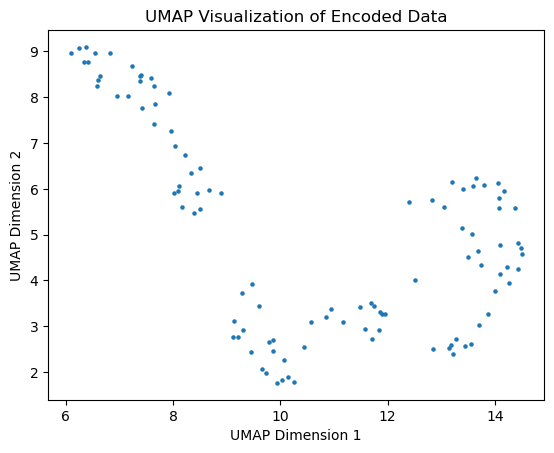

In [74]:
reducer = umap.UMAP(n_components=2)
reduced_data = reducer.fit_transform(s)

# Plot the Reduced Data 

umap_x = reduced_data[:, 0]
umap_y = reduced_data[:, 1]

plt.scatter(umap_x, umap_y, s=5)
plt.title("UMAP Visualization of Encoded Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

In [91]:
original_data = []
for i in range(len(df.index)):
    row = df.iloc[[i]]
    plate = int(row['Plate'])
    MJD = int(row['MJD'])
    FiberID = int(row['FiberID'])
    FiberID = str(FiberID)
    FiberID = (4-len(FiberID))*'0'+FiberID
    
    plate = str(plate)
    if len(plate) == 3: 
        plate = '0'+plate

    data = Table.read(f'/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/feb2024/wk1/spender/data/{plate}/spec-{plate}-{MJD}-{FiberID}.fits',
                       format='fits')
    data = data.to_pandas()

    wave = 10 ** data['loglam']
    flux = data['flux']

    data = pd.DataFrame()
    data['wave'] = wave
    data['flux'] = flux
    
    original_data.append(data)

In [97]:
import random 
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def find_closest_points(x_values, y_values, x_coord, y_coord, k=2):
    distances = np.sqrt((x_values - x_coord)**2 + (y_values - y_coord)**2)
    closest_indices = np.argsort(distances)[::-1][:2]
    return closest_indices

for i in range(25): 
    idx = random.randrange(0, len(s)) 

    x1 = umap_x[idx]
    y1 = umap_y[idx]

    original_df = original_data[idx]

    closest_indices = find_closest_points(umap_x,umap_y,x1,y1)

    fig, axs = plt.subplots(2, 1, figsize=(4, 8), sharex=True)
    
    #axs[0].plot(original_df['wave'], original_df['flux'])
    axs[0].set(title='target', ylabel='flux', xlabel='wave')

    for counter, index in enumerate(closest_indices):
        df = original_data[index]
        axs[counter].plot(df['wave'], df['flux'])
    
    axs[1].set(title=f'closest {counter}')

    plt.tight_layout()

    plt.savefig(f'/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/feb2024/wk1/spender/plots/version_{i}.png')
    plt.close()

In [ ]:
#### experiment with quality of groups

def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def find_closest_points(x_values, y_values, x_coord, y_coord, k=3):
    distances = np.sqrt((x_values - x_coord)**2 + (y_values - y_coord)**2)
    closest_indices = np.argsort(distances)[::-1][:3]
    return closest_indices

for i in range(10): 
    idx = random.randrange(0, len(y)) 

    x1 = umap_x[idx]
    y1 = umap_y[idx]

    original_df = original_data[idx]

    closest_indices = find_closest_points(umap_x,umap_y,x1,y1)

    fig, axs = plt.subplots(4, 1, figsize=(4, 16), sharex=True)
    
    axs[0].plot(original_df['wave'], original_df['flux'])
    axs[0].set(title='target', ylabel='flux', xlabel='wave')

    for counter, index in enumerate(closest_indices):
        df = original_data[index]
        axs[counter+1].plot(df['wave'], df['flux'])
        axs[counter+1].set(title=f'closest {counter+1}')

    plt.tight_layout()

    plt.savefig(f'/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/jan2024/wk2/process_data/results/plots/minicluster{i}.png')
    
    plt.clf()
    plt.close()